# Demo dftexamples

## Importing scripts

In [3]:
import sys,os
%matplotlib inline
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.fft import fft2

## Constant image

The DFT of a constant image is a single point at F(0,0), which gives the sum of all pixels in the image.

In [23]:
f = np.ones((100, 200))
print("Constant image:\n",f)
F = fft2(f)
print("\nDFT of a constant image:\n",F.round(4))

Constant image:
 [[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]

DFT of a constant image:
 [[ 20000.+0.j      0.+0.j      0.+0.j ...,      0.+0.j      0.+0.j
       0.+0.j]
 [     0.+0.j      0.+0.j      0.+0.j ...,      0.+0.j      0.+0.j
       0.+0.j]
 [     0.+0.j      0.+0.j      0.+0.j ...,      0.+0.j      0.+0.j
       0.+0.j]
 ..., 
 [     0.+0.j      0.+0.j      0.+0.j ...,      0.+0.j      0.+0.j
       0.+0.j]
 [     0.+0.j      0.+0.j      0.+0.j ...,      0.+0.j      0.+0.j
       0.+0.j]
 [     0.+0.j      0.+0.j      0.+0.j ...,      0.+0.j      0.+0.j
       0.+0.j]]


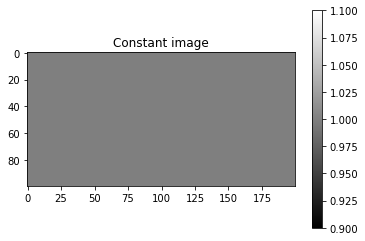

In [24]:
plt.title('Constant image')
plt.imshow(f,cmap='gray')
plt.colorbar()

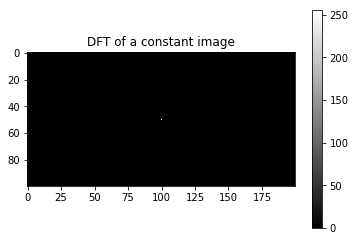

In [25]:
plt.title('DFT of a constant image')
plt.imshow(ia.dftview(F),cmap='gray')
plt.colorbar()

## Square image

The DFT of a square image is a digital sync.

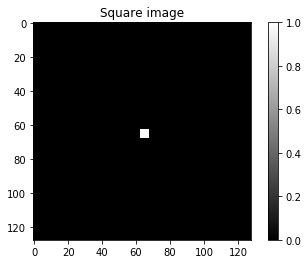

In [26]:
f = np.zeros((128, 128))
f[63:63+5,63:63+5] = 1
F = fft2(f)
plt.title('Square image')
plt.imshow(f,cmap='gray')
plt.colorbar()

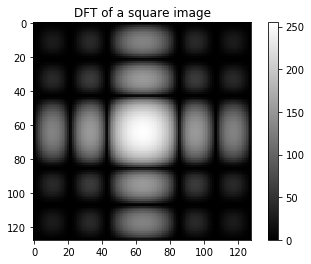

In [35]:
plt.title('DFT of a square image')
plt.imshow(ia.dftview(F),cmap='gray')
plt.colorbar()

## Pyramid image

The DFT of a pyramid is the square of the digital sync.

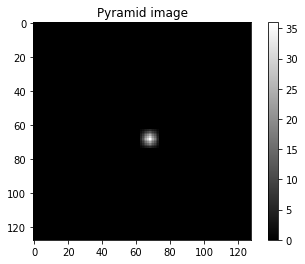

In [33]:
f = np.zeros((128, 128))
k = np.array([[1,2,3,4,5,6,5,4,3,2,1]])
k2 = np.dot(k.T, k)
f[63:63+k2.shape[0], 63:63+k2.shape[1]] = k2
F = fft2(f)
plt.title('Pyramid image')
plt.imshow(f,cmap='gray')
plt.colorbar()

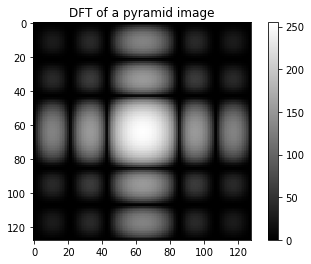

In [34]:
plt.title('DFT of a pyramid image')
plt.imshow(ia.dftview(F),cmap='gray')
plt.colorbar()

## Gaussian image

The DFT of a Gaussian image is a Gaussian image.

### Function to create a gaussian

In [4]:
import numpy as np

def gaussian(s, mu, cov):
    d = len(s)  # dimension
    n = np.prod(s) # n. of samples (pixels)
    x = np.indices(s).reshape( (d, n))
    xc = x - mu
    k = 1. * xc * np.dot(np.linalg.inv(cov), xc)
    k = np.sum(k,axis=0) #the sum is only applied to the rows
    g = (1./((2 * np.pi)**(d/2.) * np.sqrt(np.linalg.det(cov)))) * np.exp(-1./2 * k)
    return g.reshape(s)

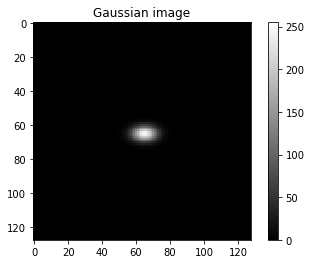

In [7]:
f = gaussian((128,128),np.transpose([[65,65]]),[[3*3,0],[0,5*5]])
plt.title('Gaussian image')
plt.imshow(ia.normalize(f),cmap='gray')
plt.colorbar()

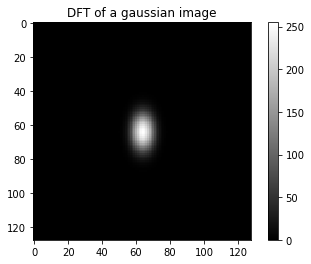

In [9]:
F = fft2(f)
plt.title('DFT of a gaussian image')
plt.imshow(ia.dftview(F),cmap='gray')
plt.colorbar()

## Impulse image

The DFT of an impulse image is an impulse image.

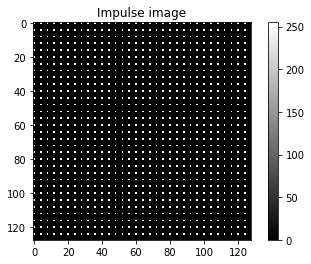

In [10]:
f = ia.comb((128,128),(4,4),(0,0))
plt.title('Impulse image')
plt.imshow(ia.normalize(f),cmap='gray')
plt.colorbar()

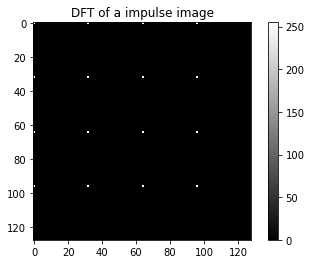

In [11]:
F = fft2(f)
plt.title('DFT of a impulse image')
plt.imshow(ia.dftview(F),cmap='gray')
plt.colorbar()

## Reference

- [Demo iadftexamples](http://adessowiki.fee.unicamp.br/adesso-1/wiki/ia636/iadftexamples/view/)

## Contributions

Luis Antonio Prado, 1st semester 2017